<a href="https://colab.research.google.com/github/RKC3000/Object-Detection/blob/main/3_Day_Object_Detection_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Detection Challenge**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**YOLOv5** setup

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


**Download Dataset**

In [2]:
!bash data/scripts/get_coco.sh

######################################################################## 100.0%
######################################################################## 100.0%
######################################################################## 100.0%


In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import Image

In [4]:
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
# imagenet_data = datasets.ImageNet(data_dir)
imagenet_data = datasets.ImageFolder(root="/content/datasets/coco/images/", transform=data_transforms)
data_loader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=4)

In [6]:
images, labels = next(iter(data_loader))

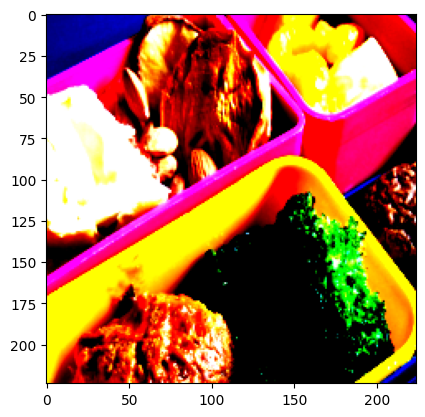

In [7]:
import matplotlib.pyplot as plt

image = images[0].numpy()

plt.imshow(image.transpose(1,2,0))
plt.show()

In [8]:
from ultralytics.yolo.utils.callbacks.base import optimizer_step
from ultralytics import YOLO

# Load a model
model = YOLO('yolov5n.yaml')  # build a new model from YAML
model = YOLO('yolov5n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov5n.yaml').load('yolov5n.pt')  # build from YAML and transfer weights

# Train the model
# model.train(data='coco128.yaml', epochs=10, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [9]:
model.train(data='coco128.yaml', epochs=10, imgsz=640, batch=16, optimizer='SGD', lr0=0.01)

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov5n.yaml, data=coco128.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, 

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir runs/detect/train

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

**Evaluation **

In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov5nu.pt')  # load an official model
model = YOLO('runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val(data = 'coco128.yaml', )  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
YOLOv5n summary (fused): 193 layers, 2649200 parameters, 0 gradients, 7.7 GFLOPs
val: Scanning /content/yolov5/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]
                   all        128        929      0.737      0.657      0.725      0.539
                person        128        254      0.926      0.639      0.796      0.559
               bicycle        128          6          1      0.323      0.627      0.377
                   car        128         46      0.744      0.254      0.362      0.205
            motorcycle        128          5      0.764          1      0.995      0.784
              airplane        128          6      0.657      0.833      0.883      0.761
                   bus        12

array([    0.55928,     0.37655,       0.205,     0.78428,     0.76128,     0.69788,     0.40786,     0.33322,     0.51314,      0.1503,     0.53919,     0.82137,     0.53919,     0.54175,     0.68921,      0.8955,     0.79364,     0.79617,     0.53919,     0.53919,      0.7042,      0.8955,     0.90578,      0.7304,
           0.35437,     0.58002,     0.14008,     0.59698,      0.7337,     0.65417,      0.6965,      0.4882,     0.27108,     0.19305,     0.15348,     0.19091,     0.46583,     0.53919,     0.25295,     0.35874,     0.41466,      0.3706,     0.29295,     0.49855,     0.30113,     0.64971,      0.6965,     0.53919,
           0.86217,     0.62878,     0.36716,     0.51641,       0.995,     0.80427,     0.82702,     0.74294,     0.32455,     0.55423,      0.5993,     0.69778,     0.47264,     0.68328,     0.79688,     0.50395,     0.13233,     0.50018,     0.53919,     0.19414,     0.83231,     0.34518,     0.53919,     0.36133,
            0.6373,     0.19033,     0.8269